In [1]:
from scipy import stats

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as web
import os
os.environ['IEX_API_KEY'] = "pk_52df9024d9a34a649655db298e9301b6"

In [34]:
start = '2015-01-01'
end = '2017-01-01'

In [37]:
united = web.DataReader('UAL', 'iex', start,end)
american = web.DataReader('AAL', 'iex',start,end)

In [38]:
united.head()

,open,high,low,close,volume
date,,,,,
2015-01-02,67.74,68.08,65.71,66.34,6215071
2015-01-05,66.87,67.35,65.50,66.15,5033887
2015-01-06,66.63,67.00,63.11,64.58,6052191
2015-01-07,64.96,66.11,64.00,65.53,5135039
2015-01-08,65.70,67.52,65.41,66.64,6889597


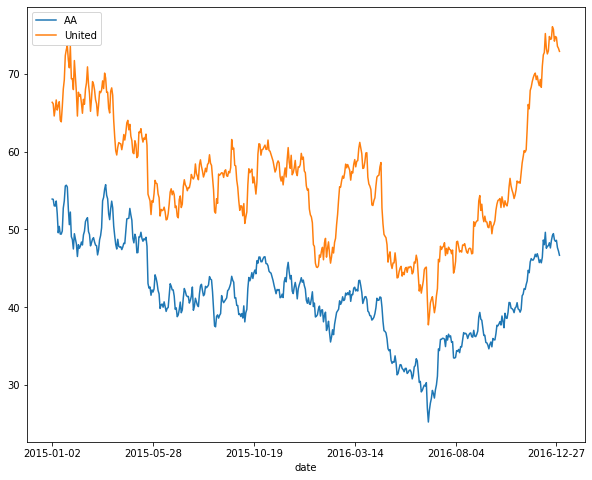

In [41]:
american['close'].plot(label='AA',figsize=(10,8))
united['close'].plot(label='United')
plt.legend()

In [42]:
np.corrcoef(american['close'], united['close'])

array([[1.       , 0.9144729],
       [0.9144729, 1.       ]])

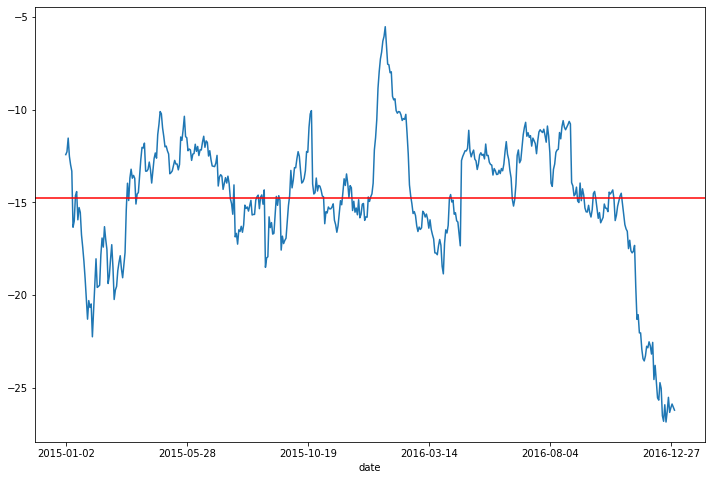

In [43]:
spread = american['close'] - united['close']
spread.plot(label='Spread', figsize=(12,8))
plt.axhline(spread.mean(), c='r')

In [46]:
def zscore(stocks):
    return(stocks-stocks.mean()) / np.std(stocks)

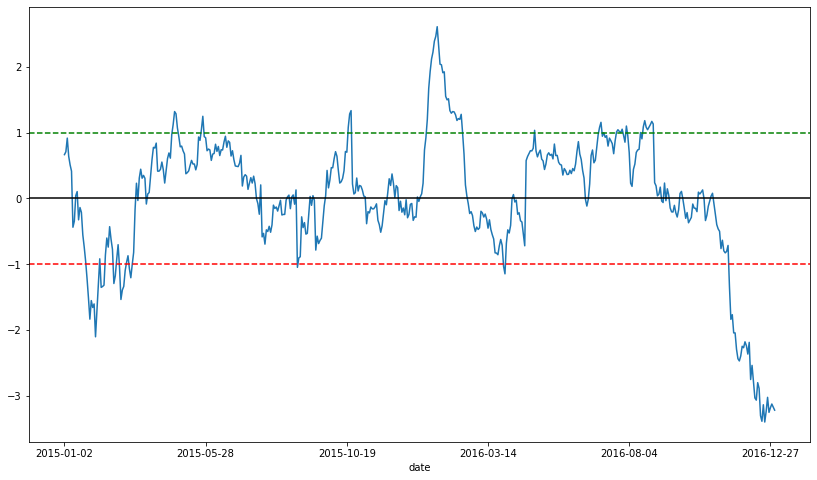

In [49]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0,c='g', ls='--')
plt.axhline(-1.0,c='r', ls='--')

In [50]:
spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()

std_30 = spread.rolling(30).std()
zscore_30_1 = (spread_mavg1-spread_mavg30)/std_30

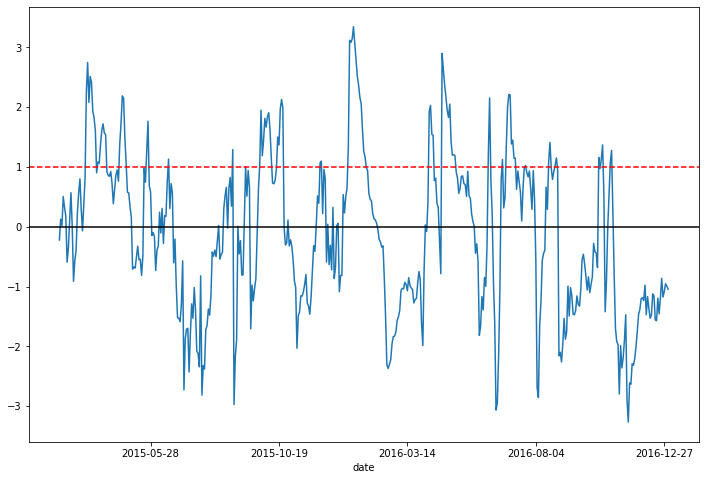

In [52]:
zscore_30_1.plot(figsize=(12, 8), label='Rolling 30 day Z score')
plt.axhline(0,color='black')
plt.axhline(1.0,color='red', ls='--');